In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel("GAIA IA v.1.2.xlsx")

data.info()
data.head()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data = data.drop(data.columns[0], axis=1)

In [ ]:
mapping = {0: 'Al2O3', 1: 'Fe2O3', 2: '>63mm', 3: '>45mm', 4:'CS-C', 5: 'RMS', 6: 'A.A.', 7: 'Carbono', 8: 'L', 9: 'a', 10: '%'}

for i in range(11):
    data.rename(columns={data.columns[i]: mapping[i]+'.0'}, inplace=True)
data.head()
total_features = len(data.columns)
print("Total number of features: ", total_features)

Total number of features:  81


In [ ]:
def plot_graph(columns, colors, legend_labels):
    for col in columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

    plt.figure(figsize=(12, 6))

    for i, col in enumerate(columns):
        plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])    

    plt.xlabel("Index")
    plt.ylabel(columns[0][:-2])
    plt.title(f"% of {columns[0][:-2]} of the Raw Materials")
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
def plot_box(columns, legend_labels):
    fig, axs = plt.subplots(2, 4, figsize=(12, 8))

    for i, col in enumerate(columns):
        row = i // 4
        col_index = i % 4
        axs[row, col_index].boxplot(data[col].dropna())
        axs[row, col_index].set_title(legend_labels[i])    
    plt.suptitle(f"% of {columns[0][:-2]} of the Raw Materials", fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()


In [ ]:
def plot_histo(columns, colors, legend_labels):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns):
        plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
    plt.xlabel(f"% of {columns[0][:-2]}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of % of {columns[0][:-2]} of the Raw Materials")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def statistics(columns):
    statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
    statistics['range'] = statistics['max'] - statistics['min']
    statistics['cv'] = statistics['std'] / statistics['mean'] * 100
    print("\nstatistics:")
    print(statistics)

In [ ]:
def zeros(columns):
    zero_counts = (data[columns] == 0).sum()
    print("\nNumber of zero values in each column:")
    print(zero_counts)


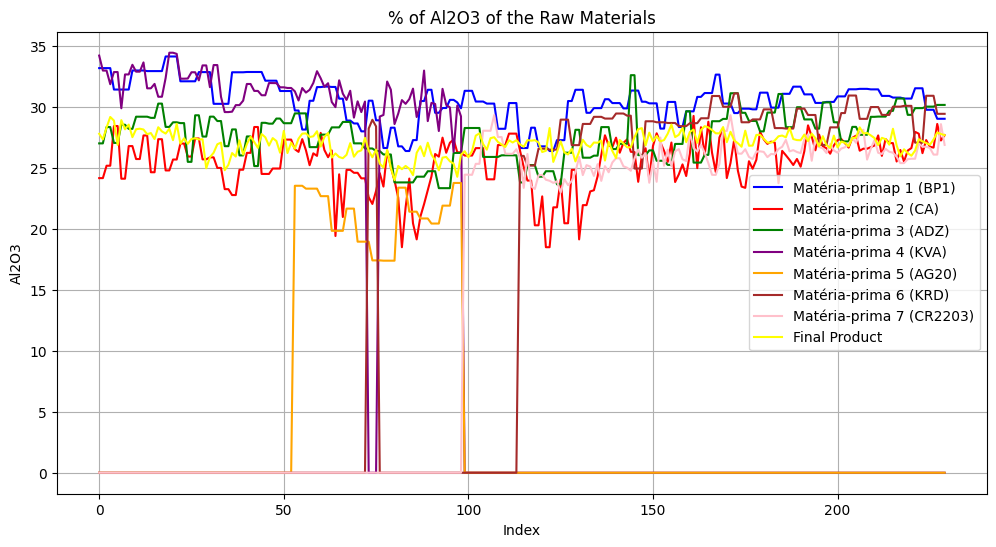

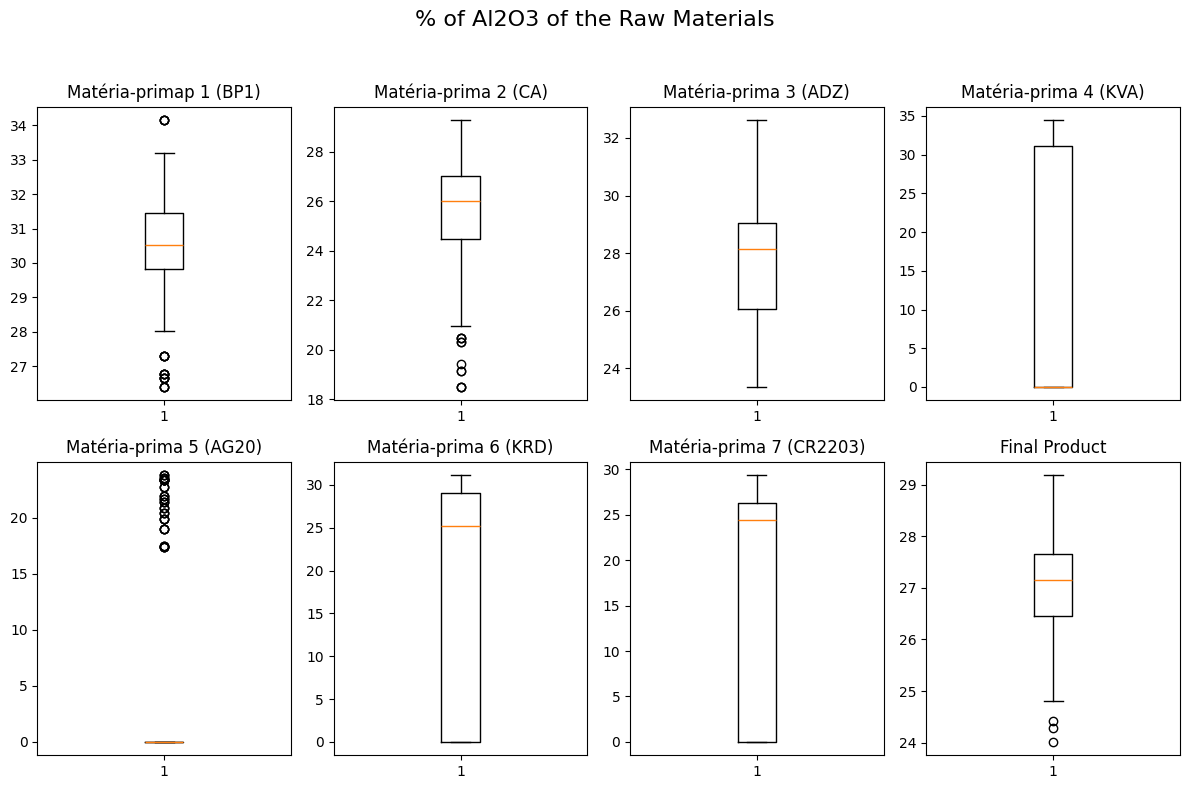

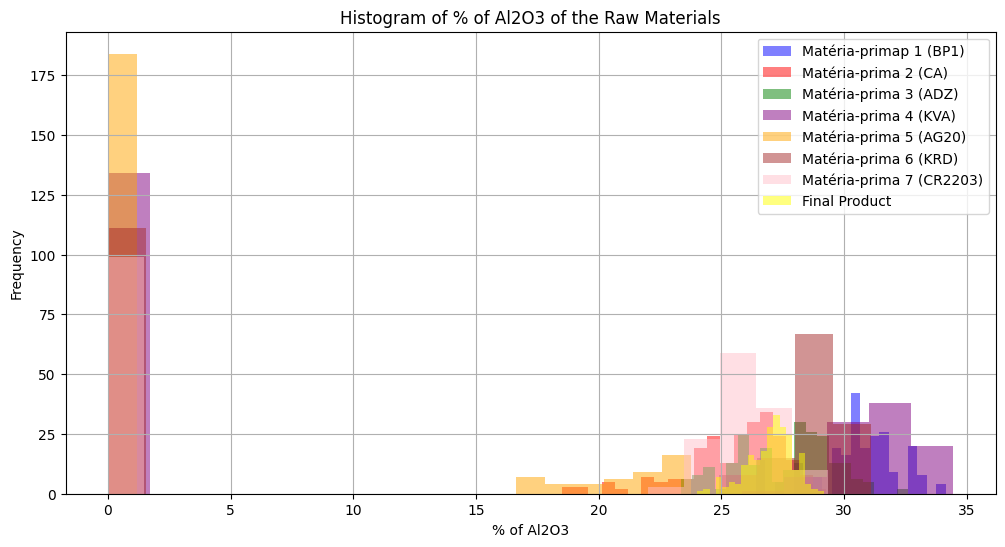


statistics:
              mean        std        min        max      range          cv
Al2O3.0  30.519007   1.711677  26.395477  34.152534   7.757057    5.608560
Al2O3.1  25.494111   2.099789  18.503185  29.274142  10.770957    8.236368
Al2O3.2  27.592513   1.973978  23.347503  32.618464   9.270961    7.154036
Al2O3.3  13.097541  15.537978   0.000000  34.460549  34.460549  118.632792
Al2O3.4   4.214914   8.501536   0.000000  23.775042  23.775042  201.701310
Al2O3.5  14.871643  14.431801   0.000000  31.121845  31.121845   97.042414
Al2O3.6  14.801735  12.930965   0.000000  29.349167  29.349167   87.361145
Al2O3.7  27.030985   0.921116  24.011236  29.190006   5.178770    3.407629

Number of zero values in each column:
Al2O3.0      0
Al2O3.1      0
Al2O3.2      0
Al2O3.3    134
Al2O3.4    184
Al2O3.5    111
Al2O3.6     99
Al2O3.7      0
dtype: int64


In [ ]:
columns = [
    "Al2O3.0",
    "Al2O3.1",
    "Al2O3.2",
    "Al2O3.3",
    "Al2O3.4",
    "Al2O3.5",
    "Al2O3.6",
    "Al2O3.7"    
]

legend_labels = [
    "Matéria-primap 1 (BP1)",
    "Matéria-prima 2 (CA)",
    "Matéria-prima 3 (ADZ)",
    "Matéria-prima 4 (KVA)",
    "Matéria-prima 5 (AG20)",
    "Matéria-prima 6 (KRD)",
    "Matéria-prima 7 (CR2203)",
    "Final Product"
]
colors = ["blue", "red", "green", "purple", "orange", "brown", "pink", "yellow"]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

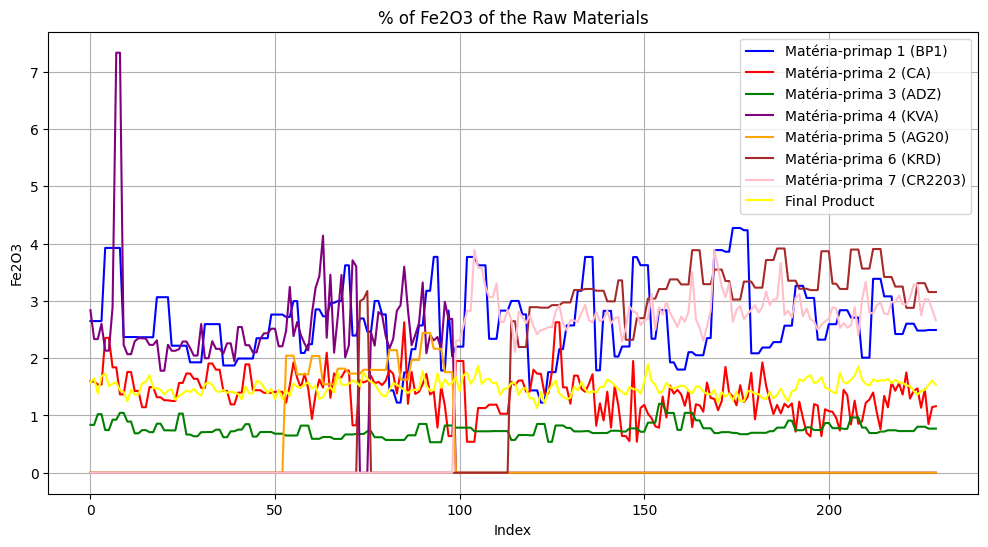

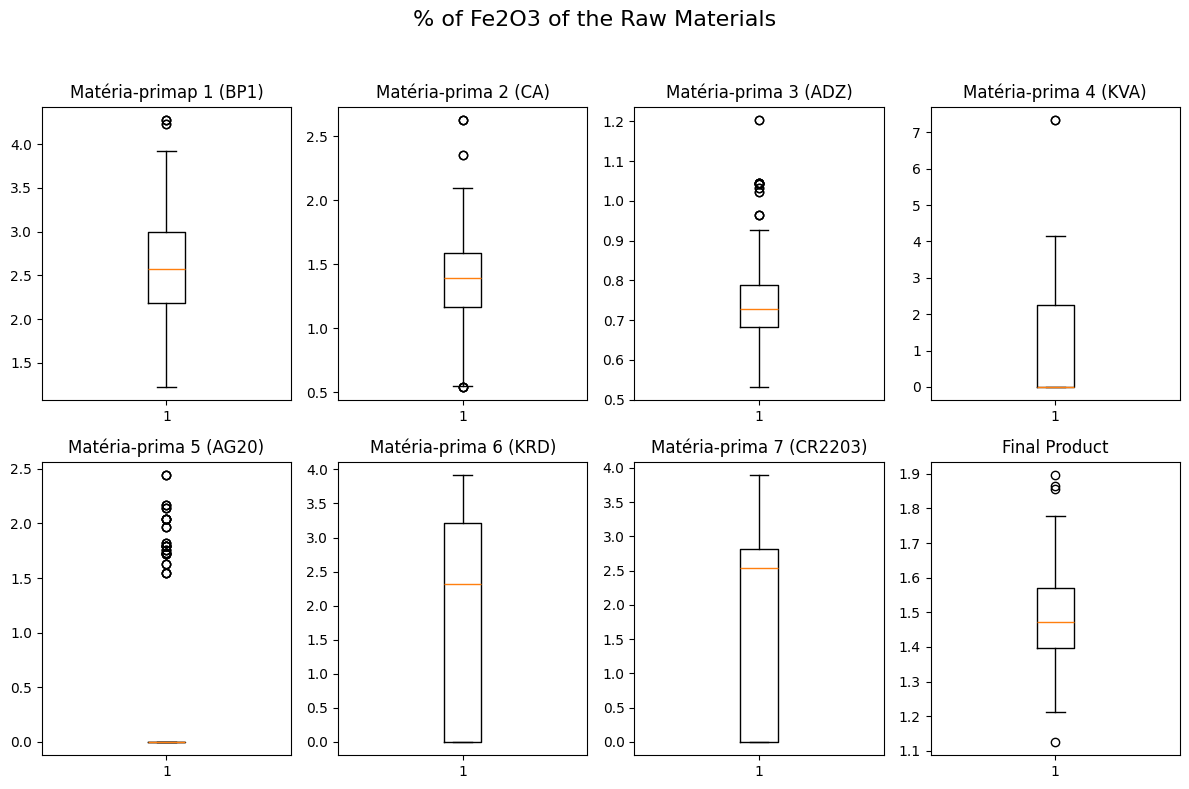

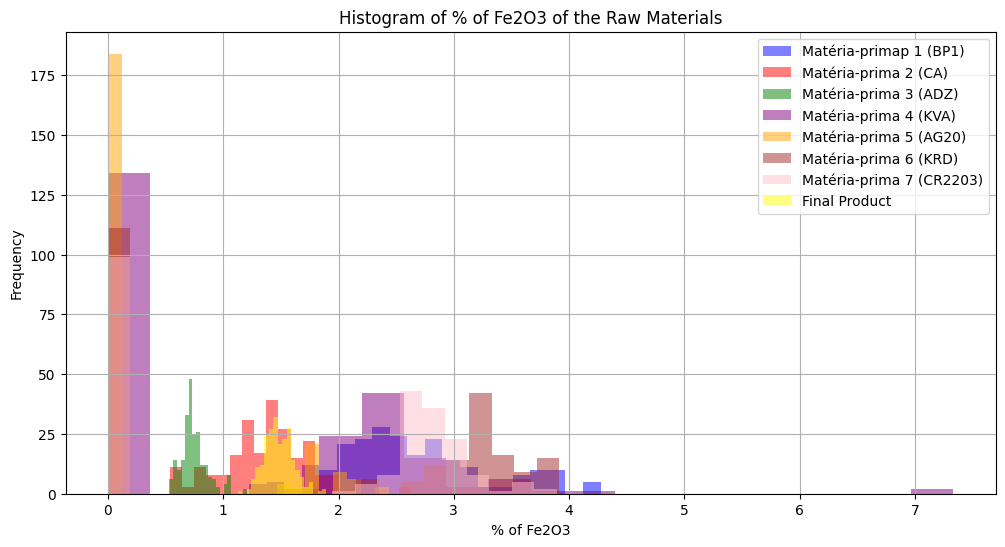


statistics:
             mean       std       min       max     range          cv
Fe2O3.0  2.626159  0.664616  1.224375  4.272979  3.048604   25.307516
Fe2O3.1  1.370403  0.374562  0.540364  2.627094  2.086730   27.332235
Fe2O3.2  0.748905  0.118354  0.532223  1.202744  0.670521   15.803655
Fe2O3.3  1.069197  1.373960  0.000000  7.333009  7.333009  128.503940
Fe2O3.4  0.376256  0.761388  0.000000  2.441014  2.441014  202.358849
Fe2O3.5  1.669744  1.639811  0.000000  3.914782  3.914782   98.207312
Fe2O3.6  1.607876  1.419546  0.000000  3.893576  3.893576   88.286997
Fe2O3.7  1.483993  0.126133  1.125854  1.895792  0.769938    8.499584

Number of zero values in each column:
Fe2O3.0      0
Fe2O3.1      0
Fe2O3.2      0
Fe2O3.3    134
Fe2O3.4    184
Fe2O3.5    111
Fe2O3.6     99
Fe2O3.7      0
dtype: int64


In [ ]:
columns = [
    "Fe2O3.0",
    "Fe2O3.1",
    "Fe2O3.2",
    "Fe2O3.3",
    "Fe2O3.4",
    "Fe2O3.5",
    "Fe2O3.6",
    "Fe2O3.7",
        
]
plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

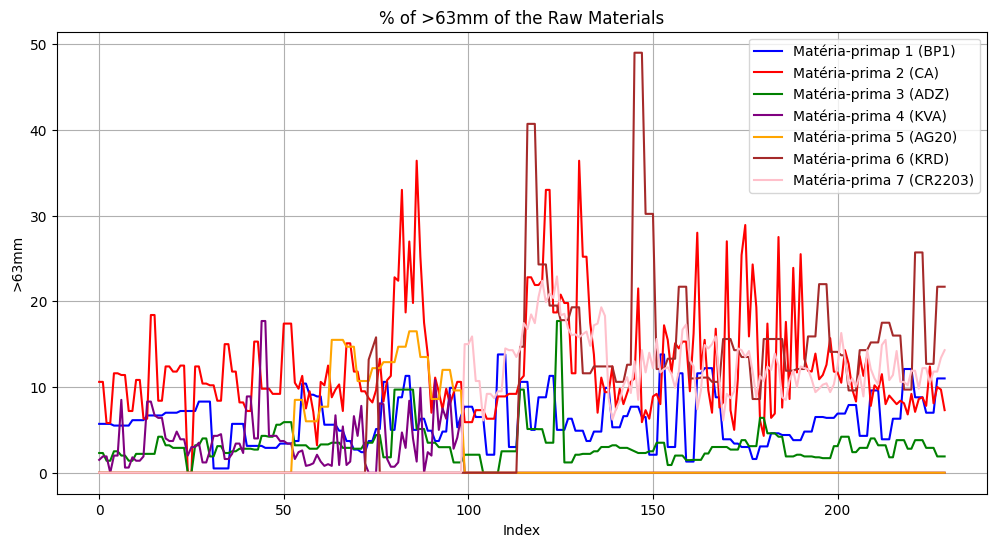

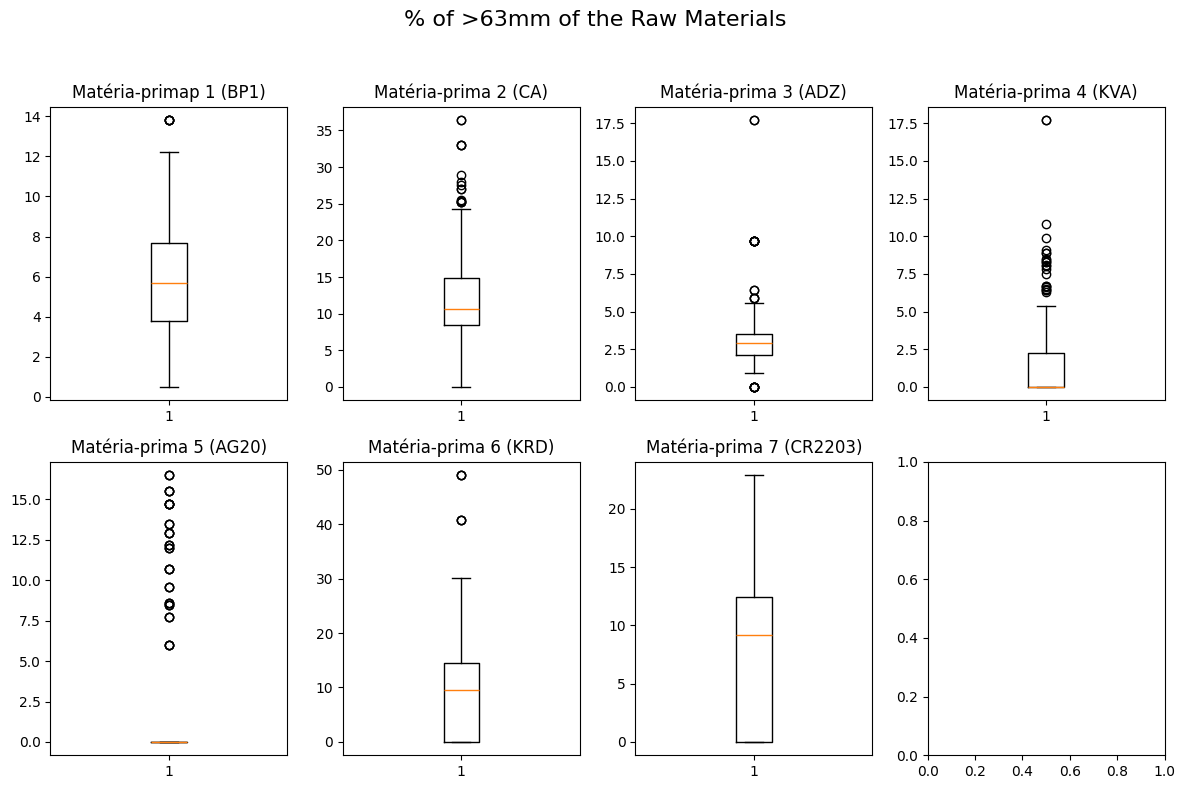

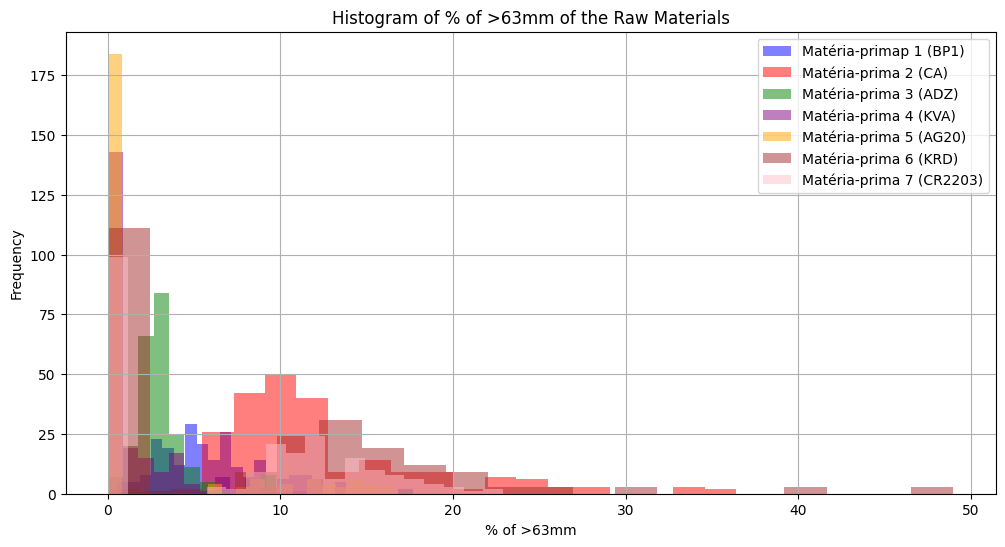


statistics:
              mean        std  min   max  range          cv
>63mm.0   6.117739   2.988625  0.5  13.8   13.3   48.851789
>63mm.1  12.362457   6.221158  0.0  36.4   36.4   50.322995
>63mm.2   3.210435   2.180898  0.0  17.7   17.7   67.931546
>63mm.3   1.636522   2.869120  0.0  17.7   17.7  175.318157
>63mm.4   2.323478   4.864304  0.0  16.5   16.5  209.354409
>63mm.5   8.690435  10.207891  0.0  49.0   49.0  117.461226
>63mm.6   7.289565   6.857434  0.0  22.9   22.9   94.071915

Number of zero values in each column:
>63mm.0      0
>63mm.1      2
>63mm.2      7
>63mm.3    136
>63mm.4    184
>63mm.5    111
>63mm.6     99
dtype: int64


In [ ]:
columns = [
    ">63mm.0",
    ">63mm.1",
    ">63mm.2",
    ">63mm.3",
    ">63mm.4",
    ">63mm.5",
    ">63mm.6"
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

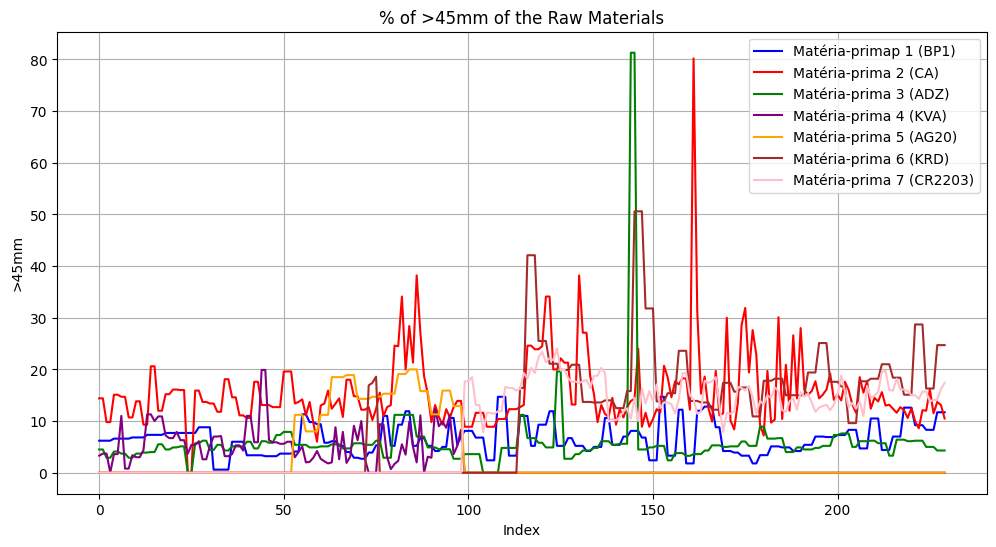

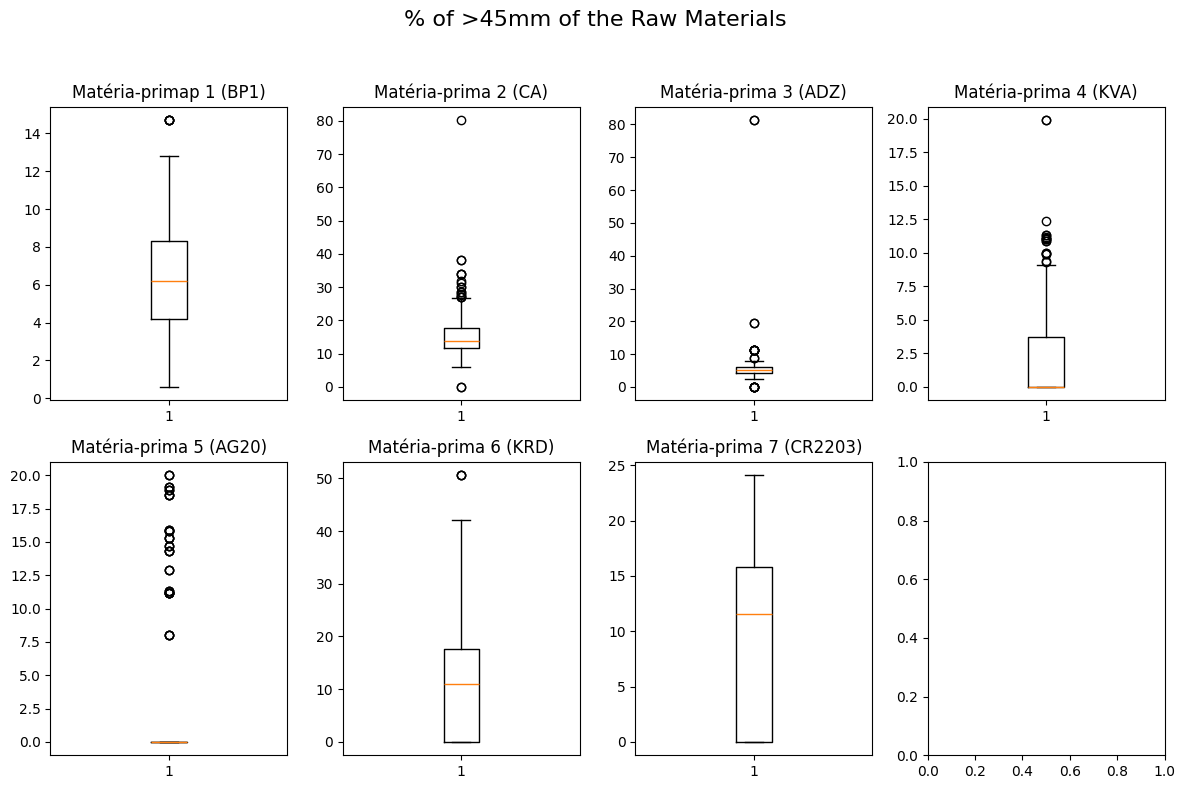

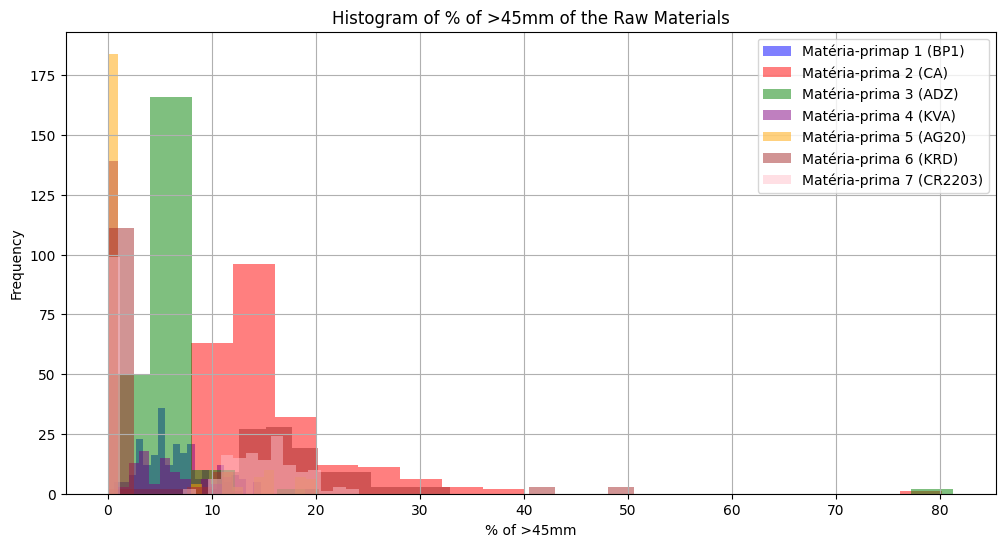


statistics:
              mean        std  min   max  range          cv
>45mm.0   6.569435   3.111798  0.6  14.7   14.1   47.367825
>45mm.1  15.518522   7.336396  0.0  80.2   80.2   47.275097
>45mm.2   5.906609   7.440710  0.0  81.3   81.3  125.972620
>45mm.3   2.407391   3.722220  0.0  19.9   19.9  154.616335
>45mm.4   2.945217   6.107069  0.0  20.0   20.0  207.355445
>45mm.5   9.932609  11.158408  0.0  50.6   50.6  112.341161
>45mm.6   8.684261   7.937237  0.0  24.1   24.1   91.397962

Number of zero values in each column:
>45mm.0      0
>45mm.1      2
>45mm.2      7
>45mm.3    136
>45mm.4    184
>45mm.5    111
>45mm.6     99
dtype: int64


In [ ]:
columns = [
    ">45mm.0",
    ">45mm.1",
    ">45mm.2",
    ">45mm.3",
    ">45mm.4",
    ">45mm.5",
    ">45mm.6"
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

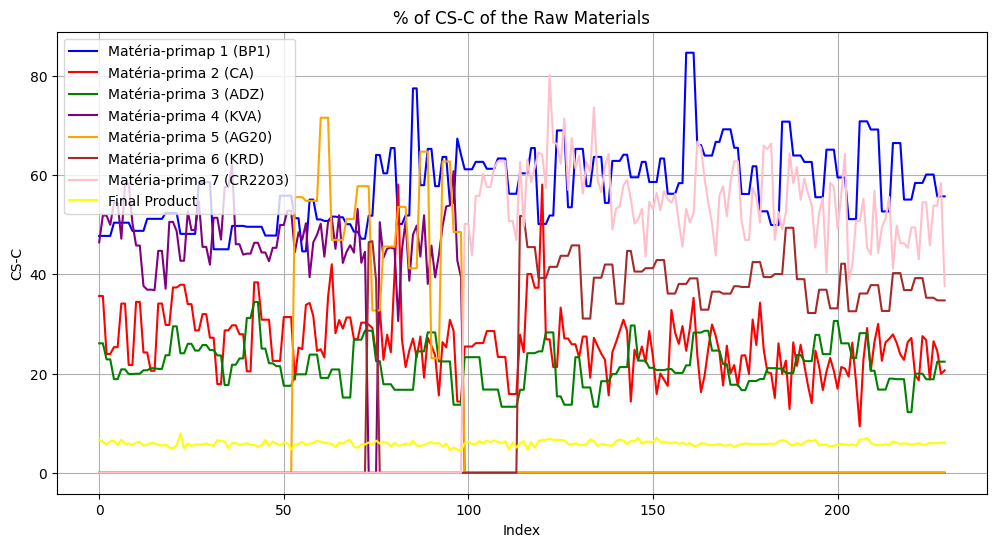

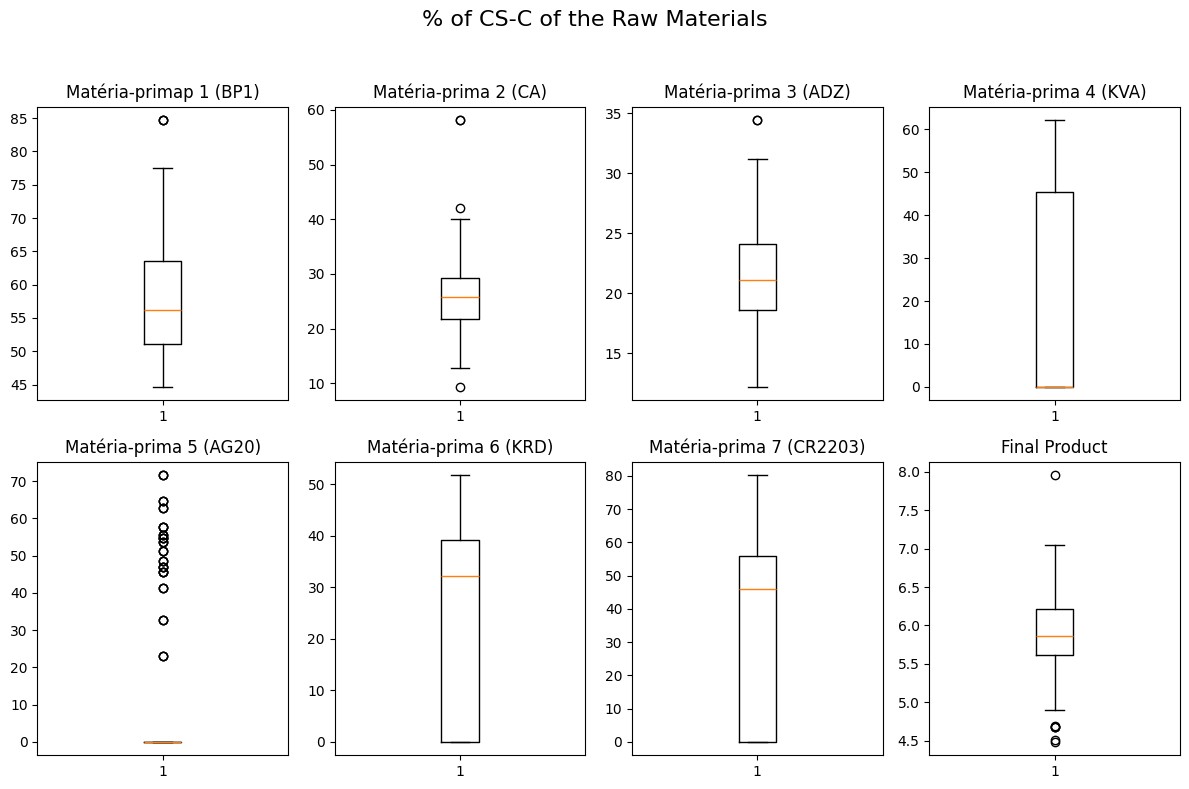

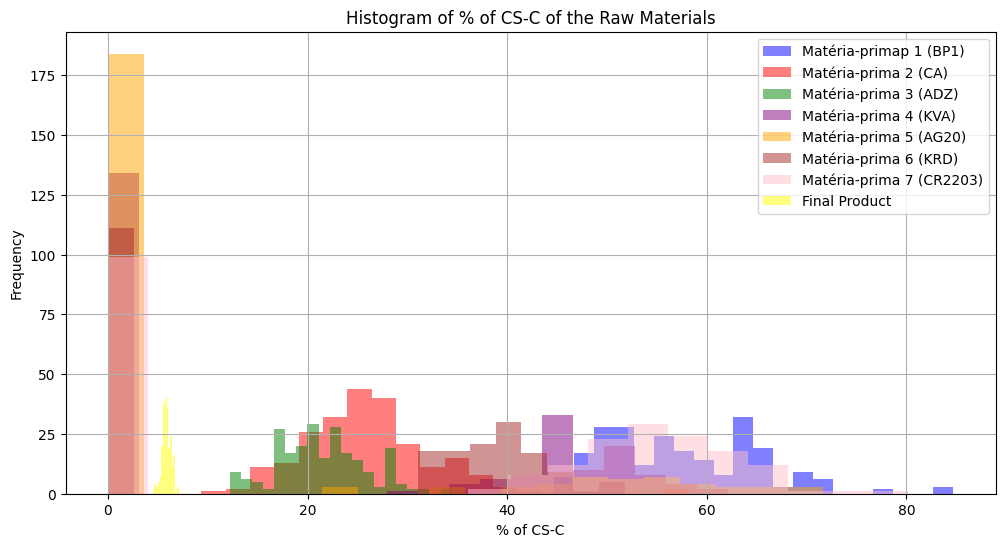


statistics:
             mean        std        min        max      range          cv
CS-C.0  57.656661   7.760067  44.646730  84.697732  40.051002   13.459100
CS-C.1  26.103246   6.573141   9.351205  58.118738  48.767533   25.181317
CS-C.2  21.539839   4.393091  12.211645  34.436012  22.224367   20.395189
CS-C.3  19.674616  23.573399   0.000000  62.086017  62.086017  119.816311
CS-C.4  10.155245  21.030779   0.000000  71.588928  71.588928  207.092787
CS-C.5  20.128238  19.753692   0.000000  51.771700  51.771700   98.139201
CS-C.6  31.391392  27.914585   0.000000  80.186353  80.186353   88.924330
CS-C.7   5.889014   0.484940   4.486154   7.953755   3.467601    8.234659

Number of zero values in each column:
CS-C.0      0
CS-C.1      0
CS-C.2      0
CS-C.3    134
CS-C.4    184
CS-C.5    111
CS-C.6     99
CS-C.7      0
dtype: int64


In [ ]:
columns = [
    "CS-C.0",
    "CS-C.1",
    "CS-C.2",
    "CS-C.3",
    "CS-C.4",
    "CS-C.5",
    "CS-C.6",
    "CS-C.7",
]
plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

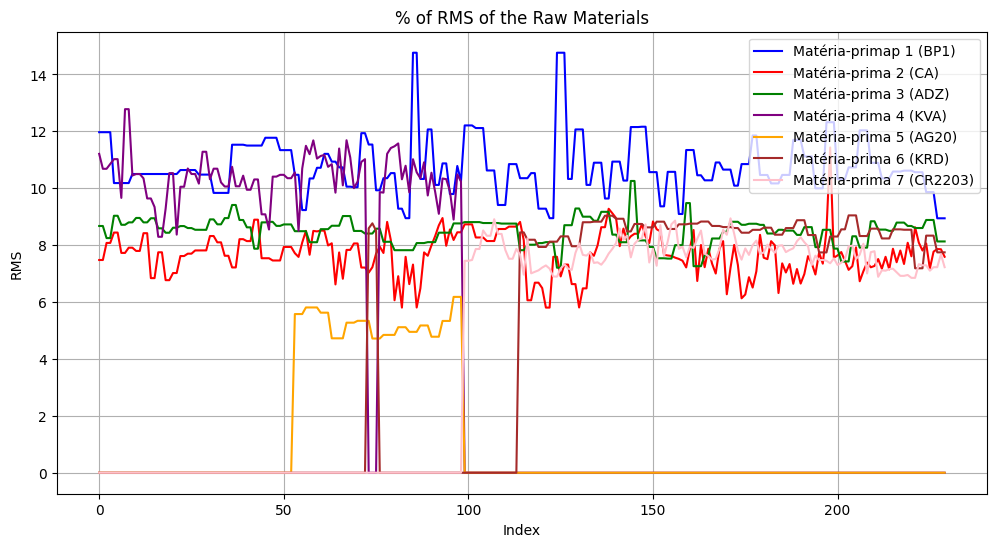

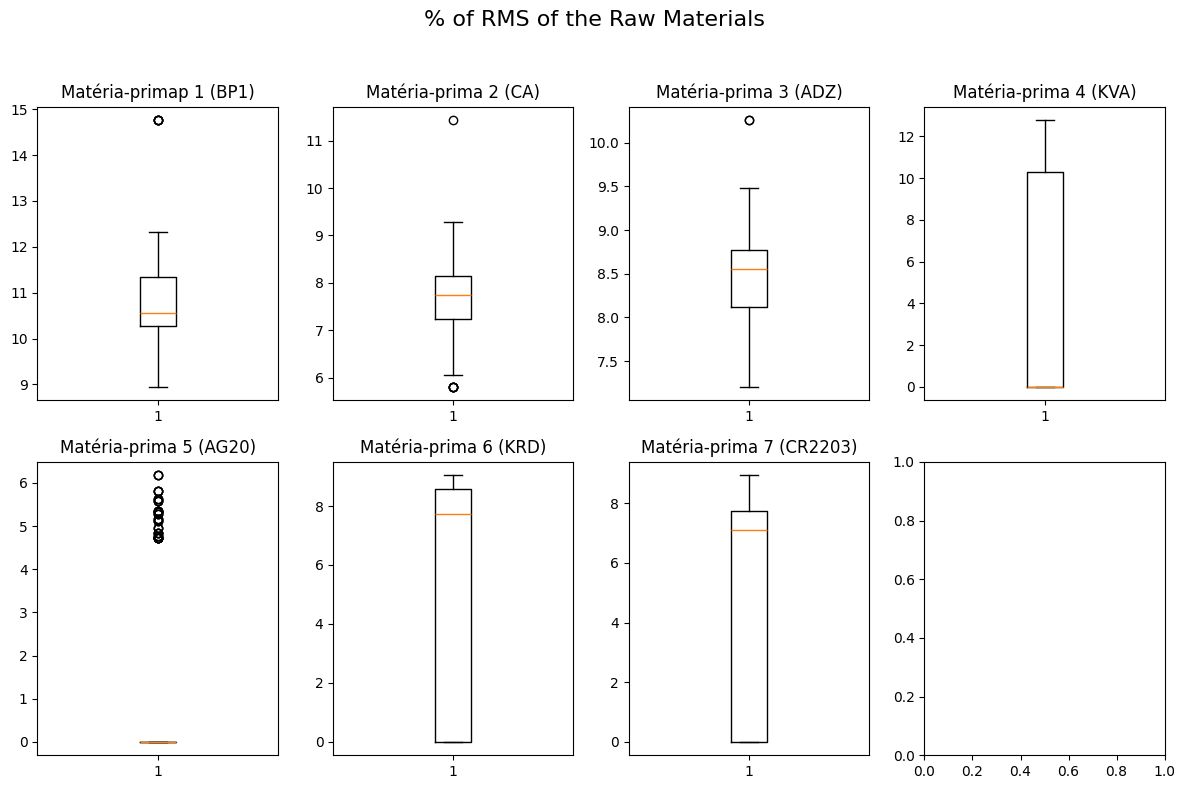

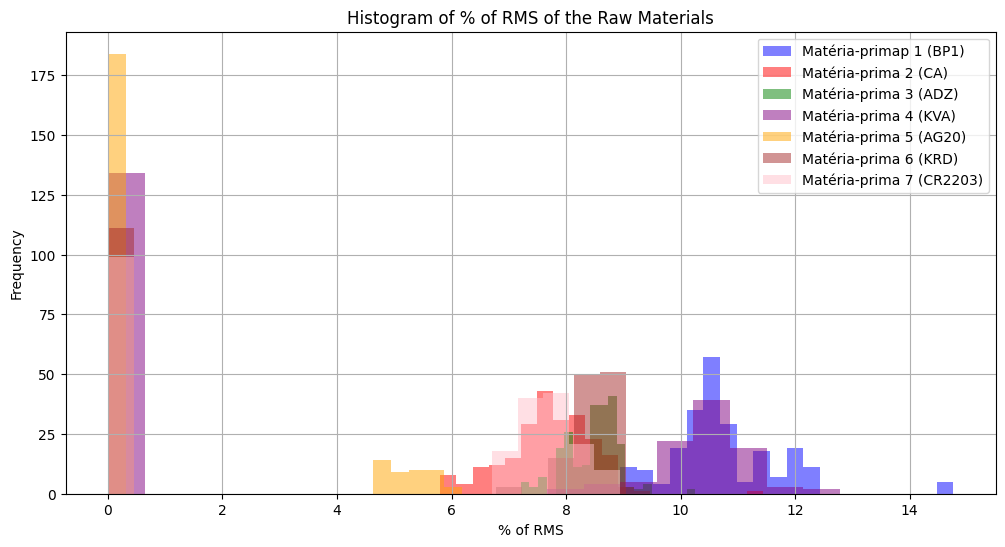


statistics:
            mean       std       min        max      range          cv
RMS.0  10.764330  1.007419  8.943260  14.763430   5.820170    9.358863
RMS.1   7.696537  0.755589  5.804632  11.433213   5.628581    9.817259
RMS.2   8.477673  0.478193  7.205862  10.255675   3.049813    5.640621
RMS.3   4.339049  5.164971  0.000000  12.779867  12.779867  119.034628
RMS.4   1.048150  2.109439  0.000000   6.180503   6.180503  201.253552
RMS.5   4.385404  4.253268  0.000000   9.045657   9.045657   96.986905
RMS.6   4.384248  3.837697  0.000000   8.941636   8.941636   87.533769

Number of zero values in each column:
RMS.0      0
RMS.1      0
RMS.2      0
RMS.3    134
RMS.4    184
RMS.5    111
RMS.6     99
dtype: int64


In [ ]:
columns = [
    "RMS.0",
    "RMS.1",
    "RMS.2",
    "RMS.3",
    "RMS.4",
    "RMS.5",
    "RMS.6"
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

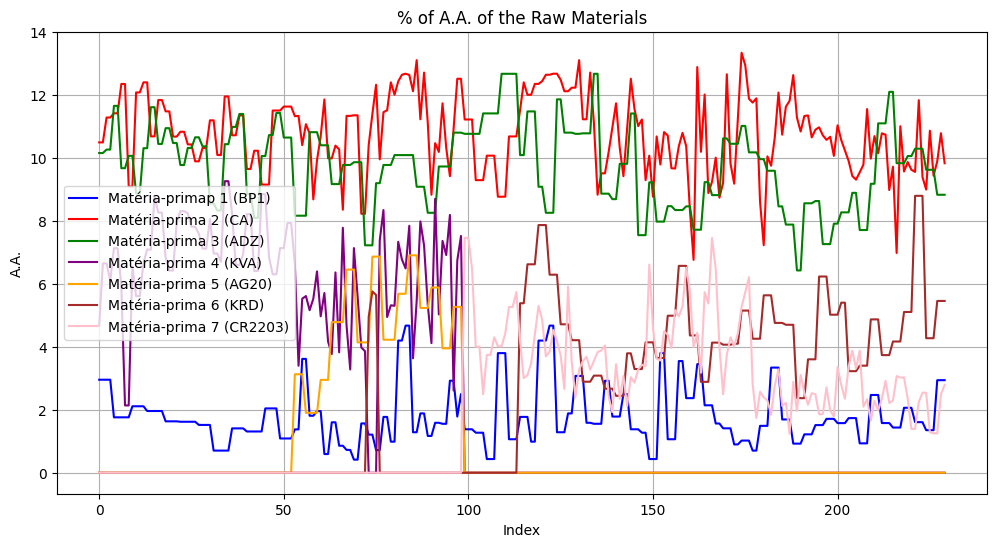

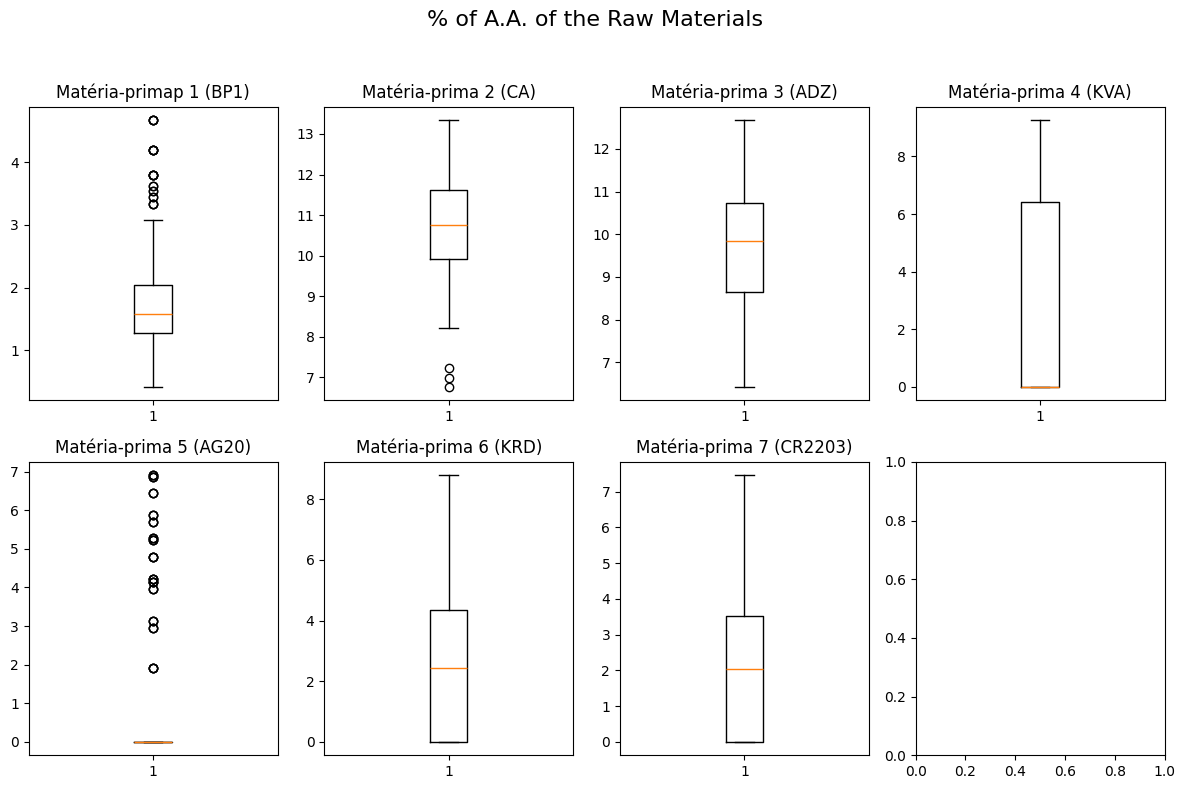

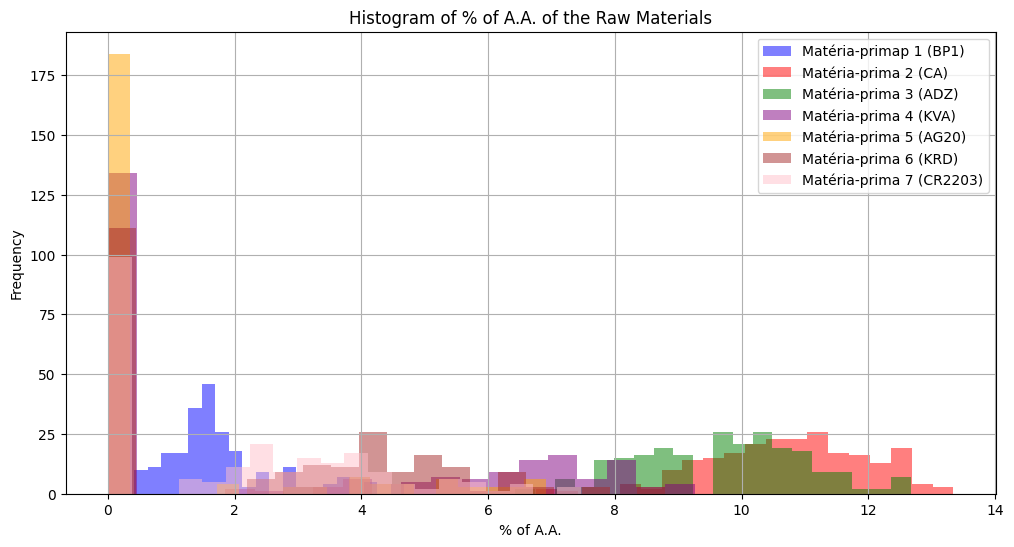


statistics:
             mean       std       min        max     range          cv
A.A..0   1.789510  0.916405  0.415191   4.672651  4.257460   51.209803
A.A..1  10.757222  1.234410  6.761373  13.340319  6.578945   11.475174
A.A..2   9.727114  1.318722  6.425399  12.670923  6.245523   13.557173
A.A..3   2.714774  3.374805  0.000000   9.259829  9.259829  124.312526
A.A..4   0.944123  2.002848  0.000000   6.904995  6.904995  212.138355
A.A..5   2.367644  2.503073  0.000000   8.794915  8.794915  105.719997
A.A..6   1.992248  2.030244  0.000000   7.458765  7.458765  101.907192

Number of zero values in each column:
A.A..0      0
A.A..1      0
A.A..2      0
A.A..3    134
A.A..4    184
A.A..5    111
A.A..6     99
dtype: int64


In [ ]:
columns = [
    "A.A..0",
    "A.A..1",
    "A.A..2",
    "A.A..3",
    "A.A..4",
    "A.A..5",
    "A.A..6"
]
plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

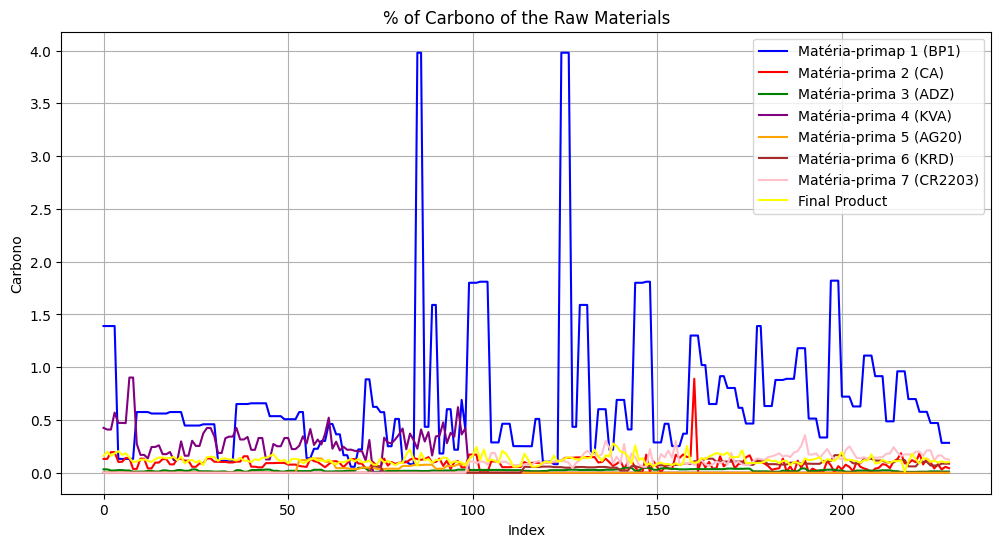

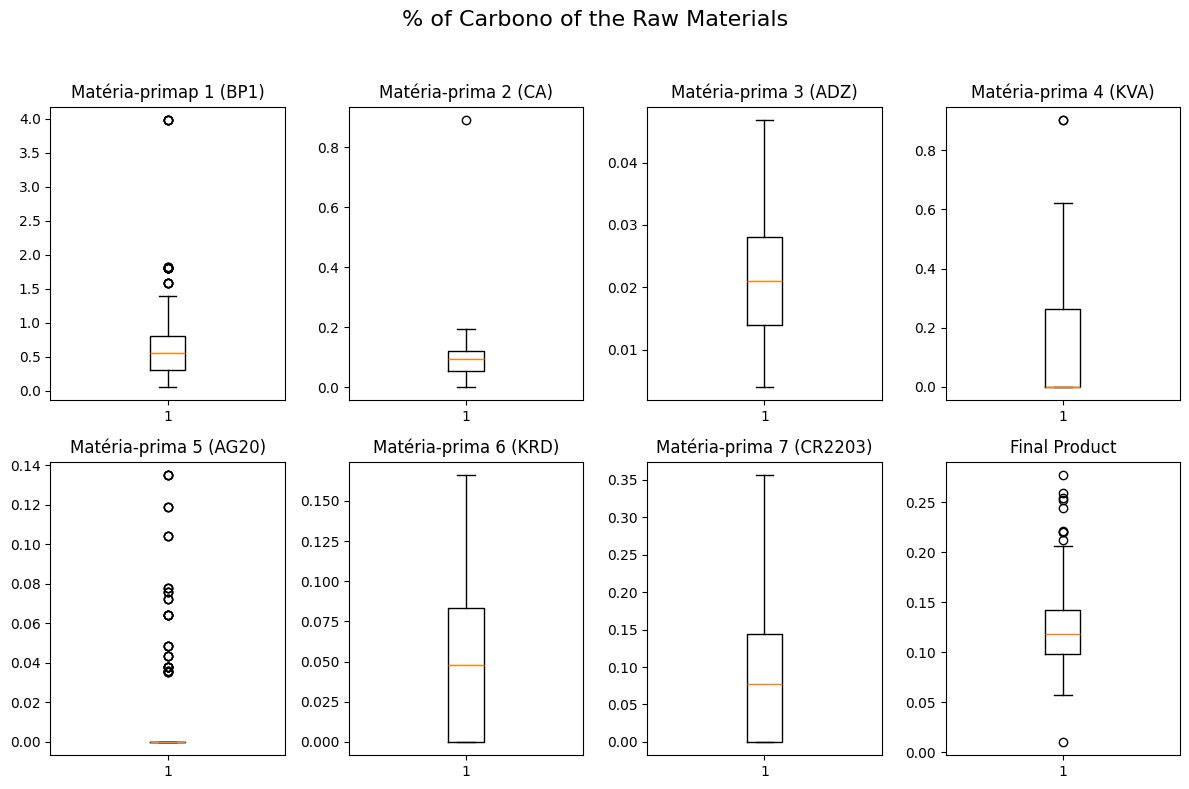

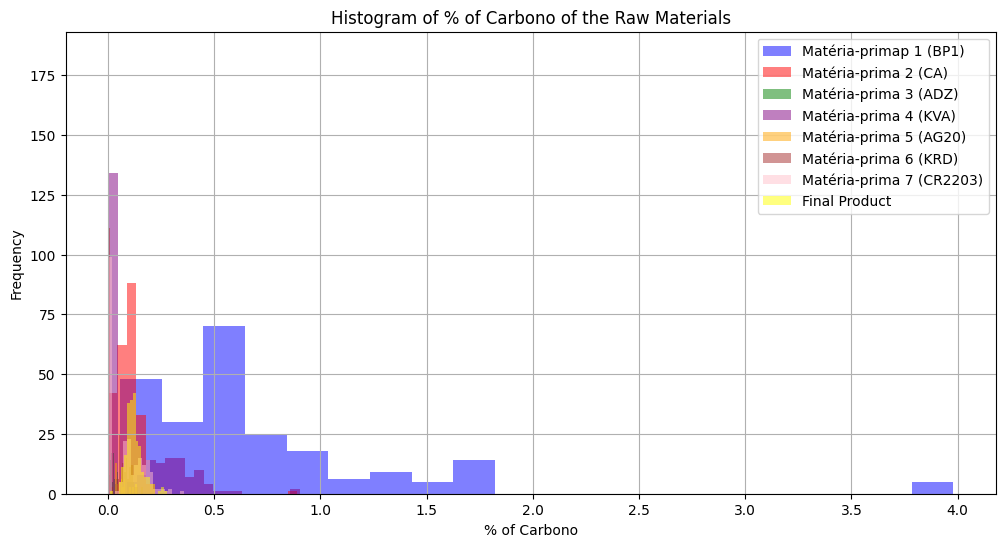


statistics:
               mean       std       min     max     range          cv
Carbono.0  0.707921  0.662165  0.056200  3.9800  3.923800   93.536646
Carbono.1  0.092630  0.068465  0.000206  0.8900  0.889794   73.912192
Carbono.2  0.021934  0.009839  0.004000  0.0468  0.042800   44.857985
Carbono.3  0.129322  0.175945  0.000000  0.9020  0.902000  136.052039
Carbono.4  0.013564  0.030716  0.000000  0.1350  0.135000  226.448804
Carbono.5  0.042952  0.046676  0.000000  0.1660  0.166000  108.669384
Carbono.6  0.079599  0.081575  0.000000  0.3560  0.356000  102.482464
Carbono.7  0.124310  0.039589  0.010200  0.2770  0.266800   31.846883

Number of zero values in each column:
Carbono.0      0
Carbono.1      0
Carbono.2      0
Carbono.3    134
Carbono.4    184
Carbono.5    111
Carbono.6     99
Carbono.7      0
dtype: int64


In [ ]:
columns = [
    "Carbono.0",
    "Carbono.1",
    "Carbono.2",
    "Carbono.3",
    "Carbono.4",
    "Carbono.5",
    "Carbono.6",
    "Carbono.7",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

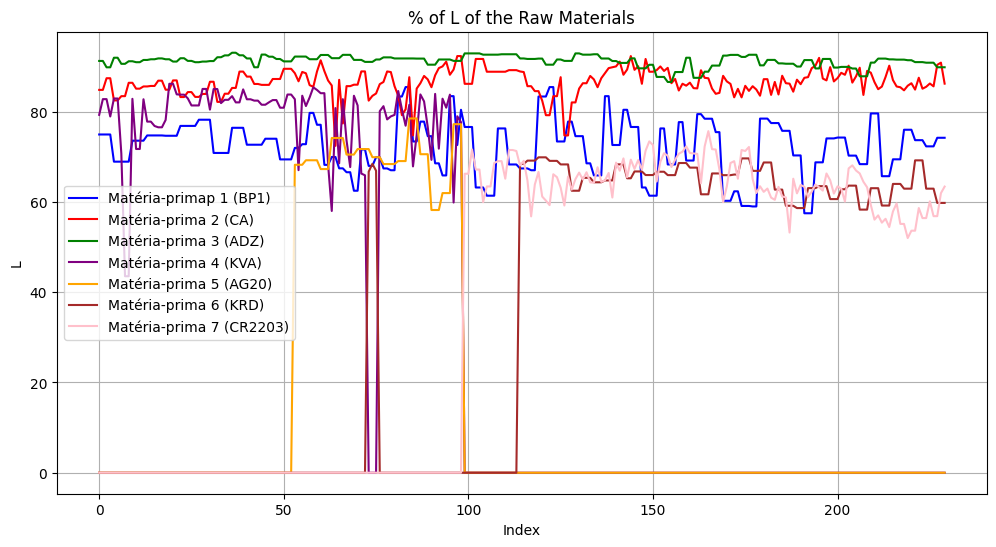

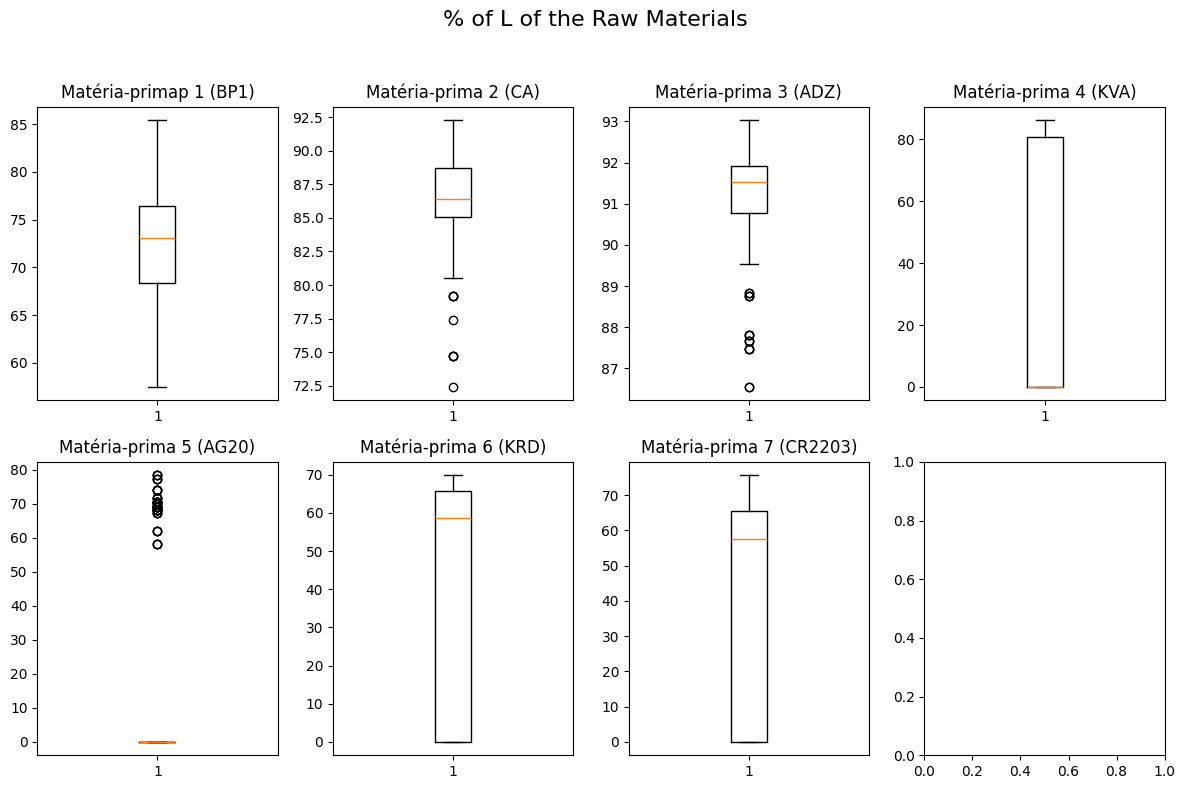

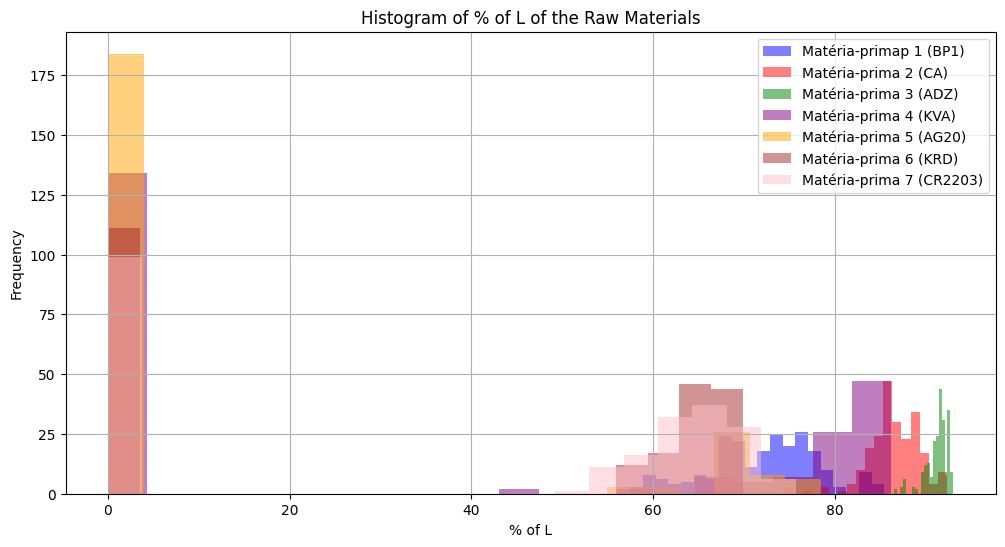


statistics:
          mean        std    min    max  range          cv
L.0  72.163493   6.034784  57.47  85.42  27.95    8.362656
L.1  86.417312   3.021424  72.40  92.29  19.89    3.496318
L.2  91.209884   1.263497  86.55  93.03   6.48    1.385263
L.3  32.902109  39.277500   0.00  86.15  86.15  119.376846
L.4  13.944652  28.036725   0.00  78.47  78.47  201.057183
L.5  33.583337  32.591794   0.00  69.86  69.86   97.047516
L.6  36.761710  32.256048   0.00  75.66  75.66   87.743600

Number of zero values in each column:
L.0      0
L.1      0
L.2      0
L.3    134
L.4    184
L.5    111
L.6     99
dtype: int64


In [ ]:
columns = [
    "L.0",
    "L.1",
    "L.2",
    "L.3",
    "L.4",
    "L.5",
    "L.6"
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

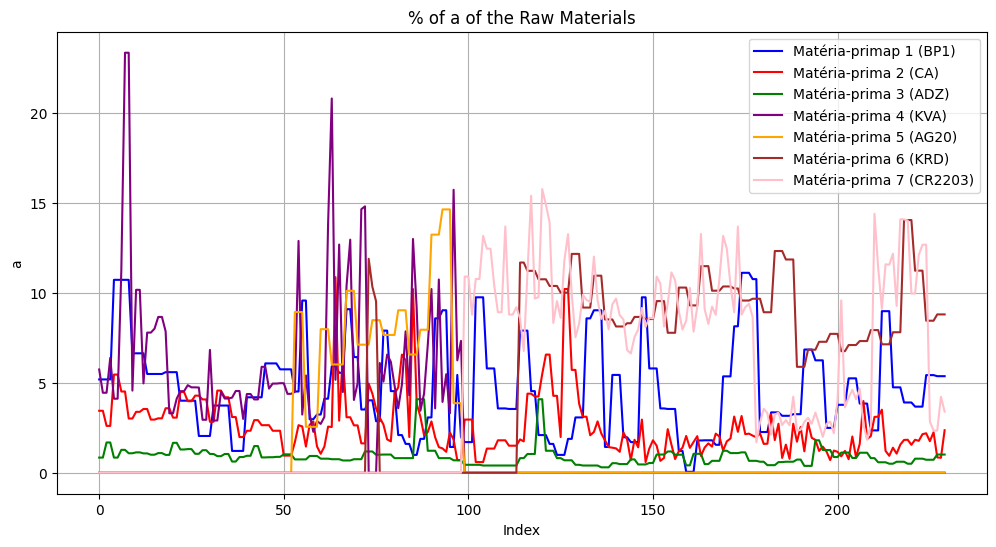

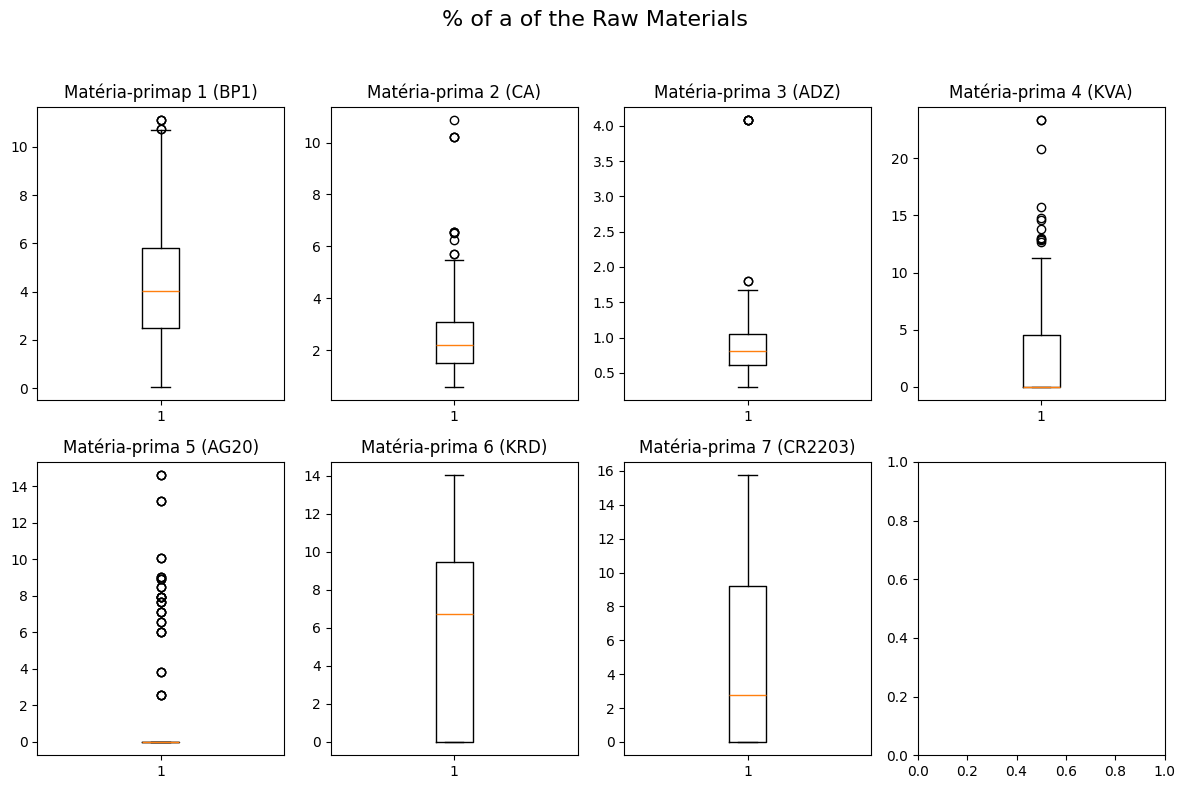

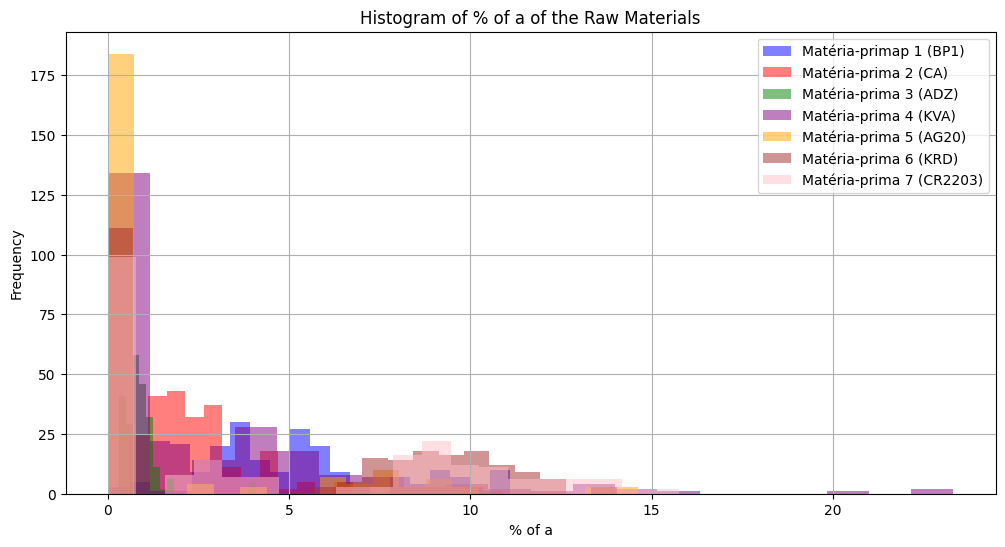


statistics:
         mean       std   min    max  range          cv
a.0  4.642754  2.648610  0.05  11.10  11.05   57.048267
a.1  2.602091  1.651178  0.59  10.86  10.27   63.455831
a.2  0.907051  0.564531  0.30   4.08   3.78   62.238108
a.3  2.719565  4.214939  0.00  23.32  23.32  154.985777
a.4  1.588348  3.465109  0.00  14.62  14.62  218.158059
a.5  4.853326  4.872429  0.00  14.03  14.03  100.393614
a.6  4.704246  4.962130  0.00  15.75  15.75  105.481936

Number of zero values in each column:
a.0      0
a.1      0
a.2      0
a.3    134
a.4    184
a.5    111
a.6     99
dtype: int64


In [ ]:
columns = [
    "a.0",
    "a.1",
    "a.2",
    "a.3",
    "a.4",
    "a.5",
    "a.6"
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)


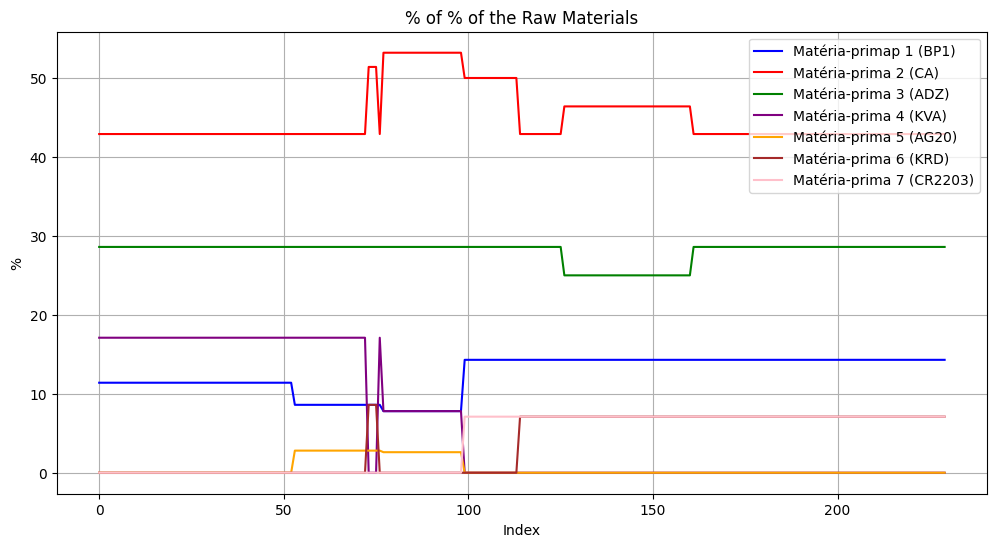

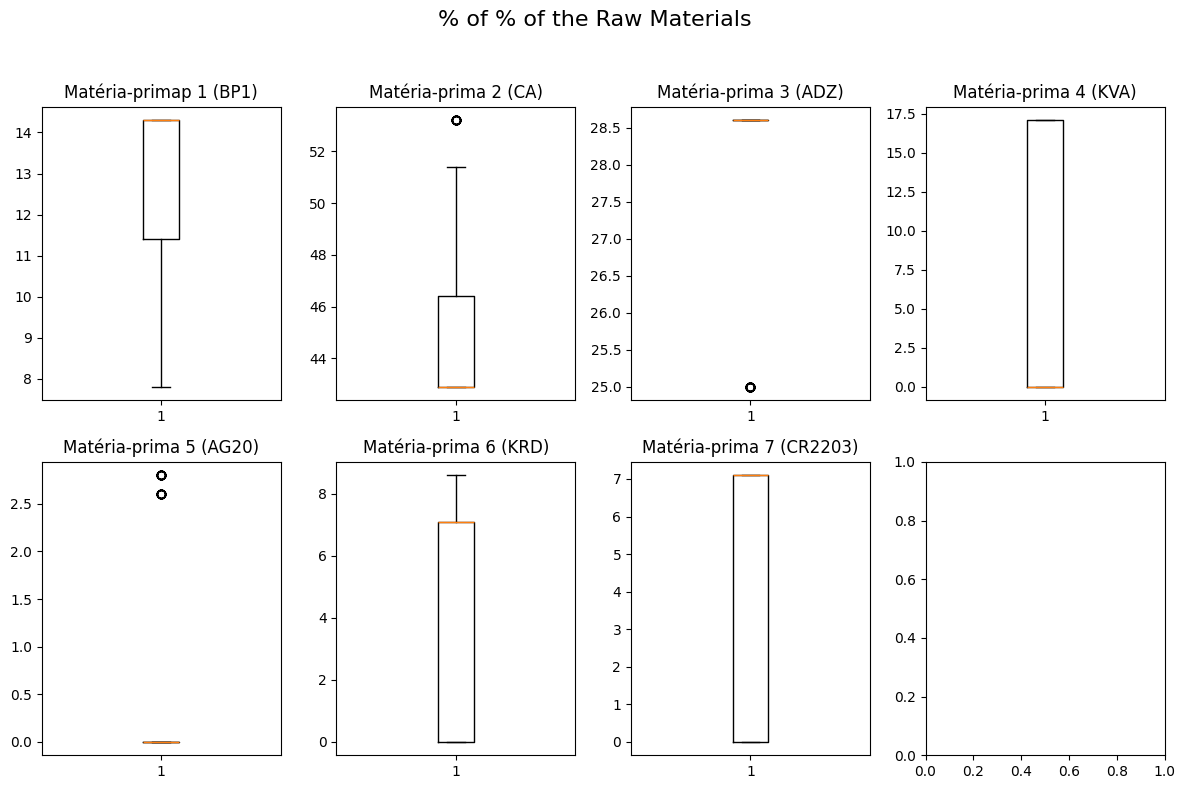

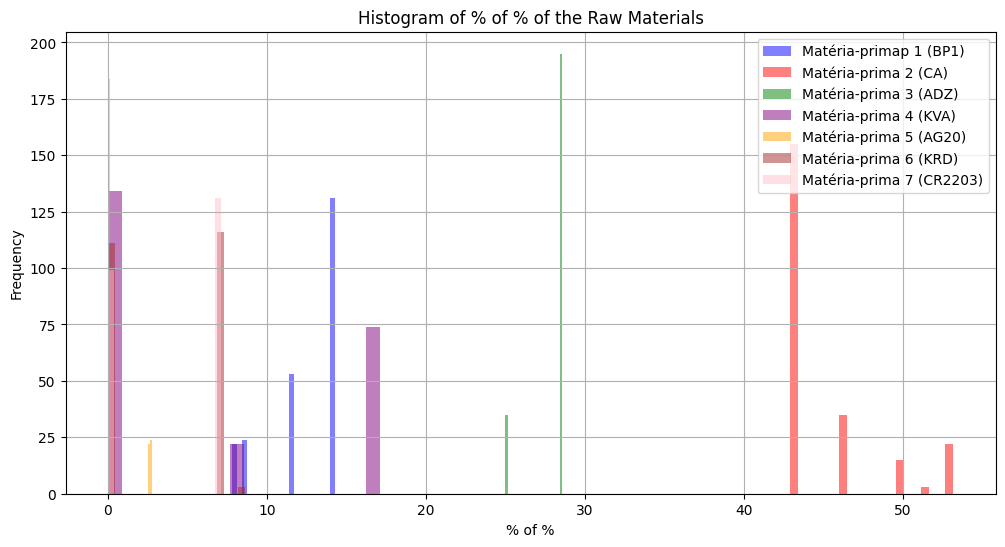


statistics:
          mean       std   min   max  range          cv
%.0  12.415217  2.417130   7.8  14.3    6.5   19.469093
%.1  44.991739  3.452291  42.9  53.2   10.3    7.673167
%.2  28.052174  1.295902  25.0  28.6    3.6    4.619614
%.3   6.247826  7.818546   0.0  17.1   17.1  125.140269
%.4   0.540870  1.085023   0.0   2.8    2.8  200.607099
%.5   3.693043  3.578544   0.0   8.6    8.6   96.899592
%.6   4.043913  3.523140   0.0   7.1    7.1   87.122058

Number of zero values in each column:
%.0      0
%.1      0
%.2      0
%.3    134
%.4    184
%.5    111
%.6     99
dtype: int64


In [ ]:
columns = [
    "%.0",
    "%.1",
    "%.2",
    "%.3",
    "%.4",
    "%.5",
    "%.6"
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)


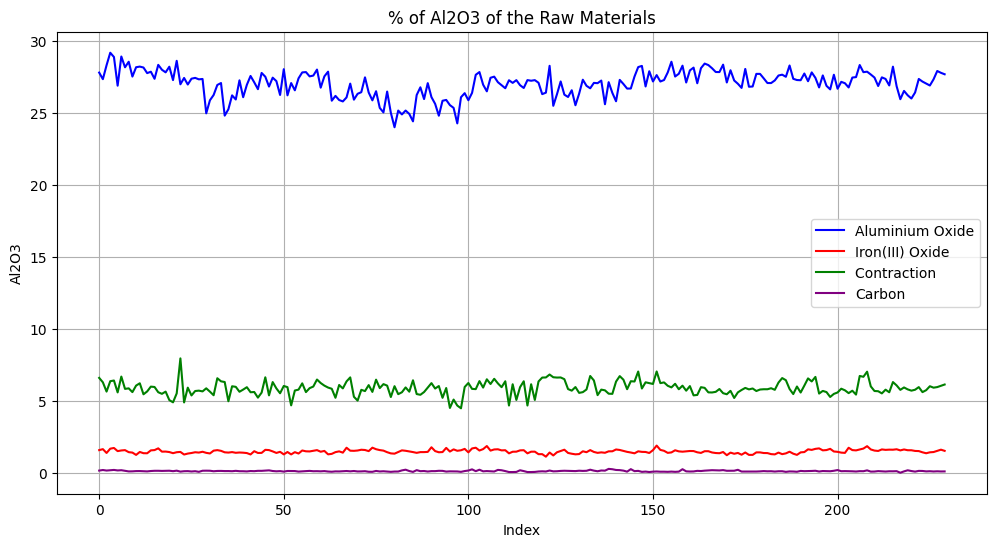

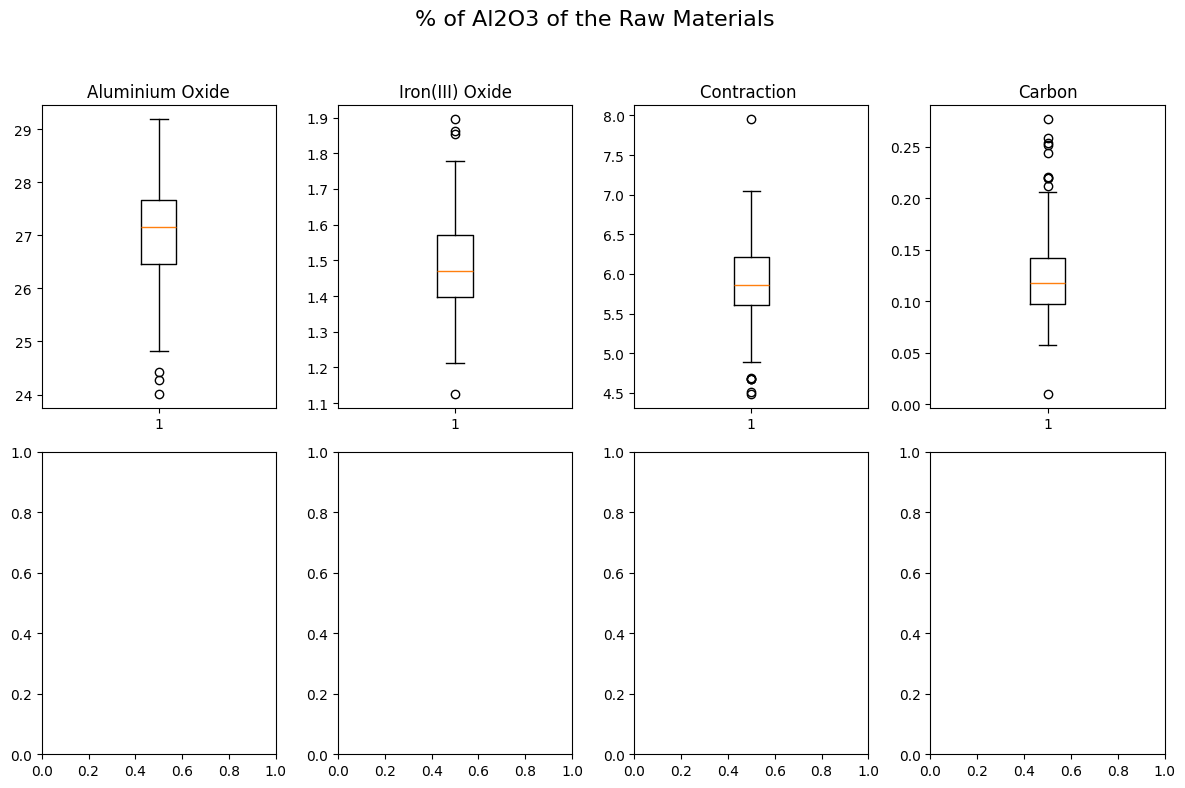

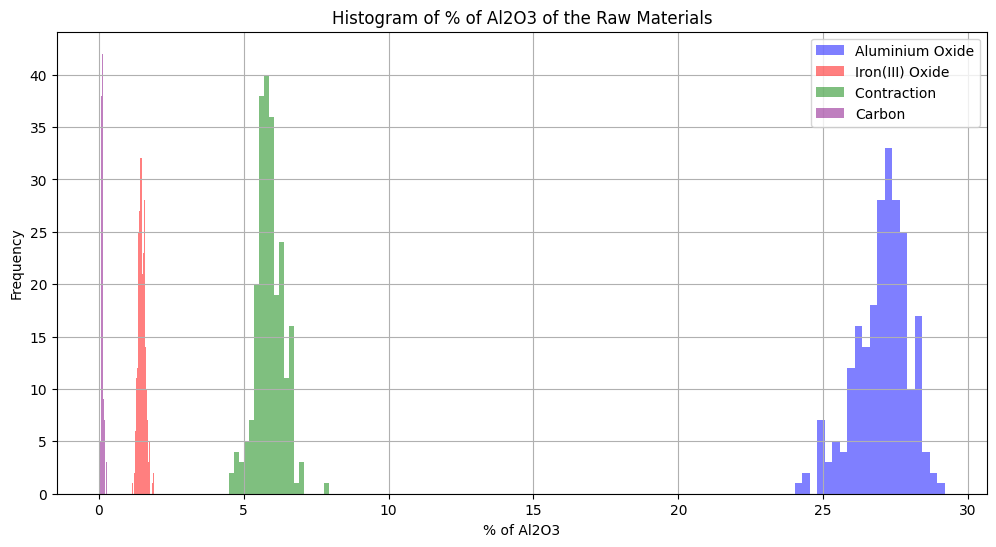


statistics:
                mean       std        min        max     range         cv
Al2O3.7    27.030985  0.921116  24.011236  29.190006  5.178770   3.407629
Fe2O3.7     1.483993  0.126133   1.125854   1.895792  0.769938   8.499584
CS-C.7      5.889014  0.484940   4.486154   7.953755  3.467601   8.234659
Carbono.7   0.124310  0.039589   0.010200   0.277000  0.266800  31.846883

Number of zero values in each column:
Al2O3.7      0
Fe2O3.7      0
CS-C.7       0
Carbono.7    0
dtype: int64


In [ ]:
columns = [
    "Al2O3.7",
    "Fe2O3.7",
    "CS-C.7",
    "Carbono.7",
]

legend_labels = ["Aluminium Oxide", "Iron(III) Oxide", "Contraction ", "Carbon"]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)


In [ ]:
actual_zeros = set()
total_zeros = 0
for i in range(len(data)):
    for j in range(len(mapping)-1):
        for k in range(7):
            if data.iloc[i, j+11*k] == 0 and data.iloc[i, 10+ 11*k] != 0:
                print(f"Row {i} has a zero in {mapping[j]}.{k} but not in %")
                actual_zeros.add((i, j+11*k))

print(f"\nTotal number of actual zeros: {len(actual_zeros)}")

for col in data.columns:
    total_zeros = total_zeros + (data[col] == 0).sum()

print(f"Total number of zeros in the dataset: {total_zeros}") 

Row 3 has a zero in >63mm.3 but not in %
Row 3 has a zero in >45mm.3 but not in %
Row 24 has a zero in >63mm.1 but not in %
Row 24 has a zero in >63mm.2 but not in %
Row 24 has a zero in >45mm.1 but not in %
Row 24 has a zero in >45mm.2 but not in %
Row 25 has a zero in >63mm.1 but not in %
Row 25 has a zero in >63mm.2 but not in %
Row 25 has a zero in >45mm.1 but not in %
Row 25 has a zero in >45mm.2 but not in %
Row 88 has a zero in >63mm.3 but not in %
Row 88 has a zero in >45mm.3 but not in %
Row 104 has a zero in >63mm.2 but not in %
Row 104 has a zero in >45mm.2 but not in %
Row 105 has a zero in >63mm.2 but not in %
Row 105 has a zero in >45mm.2 but not in %
Row 106 has a zero in >63mm.2 but not in %
Row 106 has a zero in >45mm.2 but not in %
Row 107 has a zero in >63mm.2 but not in %
Row 107 has a zero in >45mm.2 but not in %
Row 108 has a zero in >63mm.2 but not in %
Row 108 has a zero in >45mm.2 but not in %

Total number of actual zeros: 22
Total number of zeros in the datas

In [ ]:
for col in data.columns:
    if col not in actual_zeros:
        data[col] = data[col].replace(0, 1e-3)

for i, j in actual_zeros:
    data.iloc[i, j] = 0

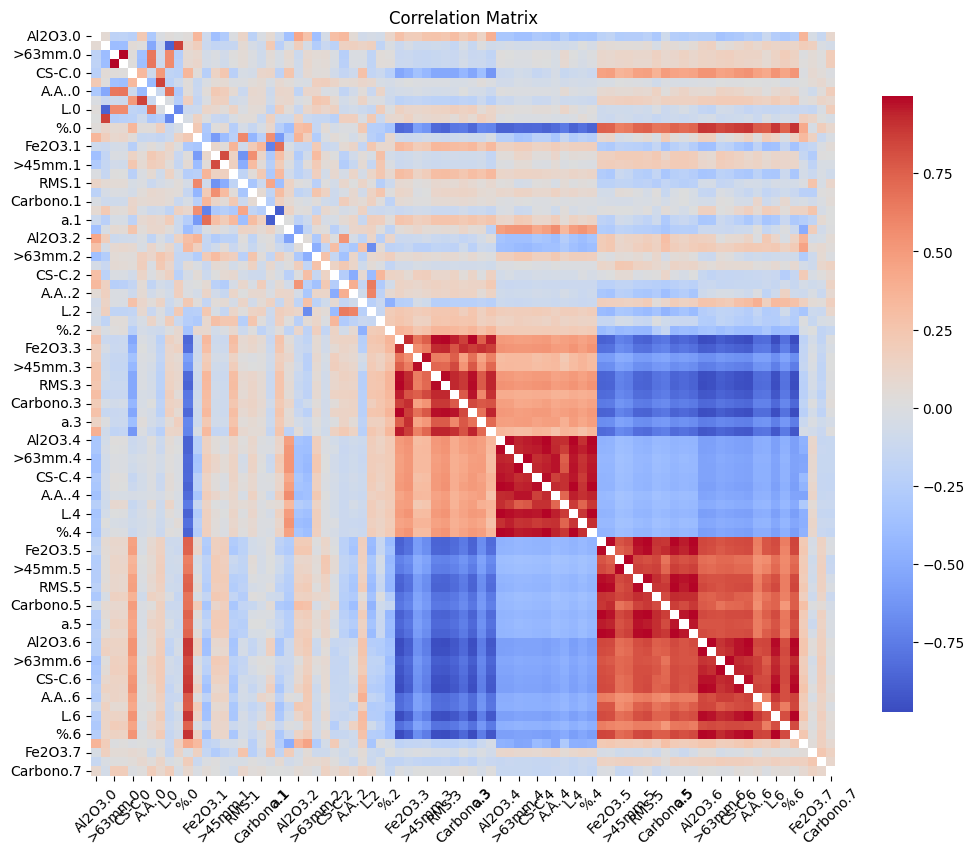

In [ ]:
corr_matrix = data.corr()
mask = np.eye(len(corr_matrix), dtype=bool)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
plt.show()



In [ ]:
target_columns = [
    "Al2O3.7",
    "Fe2O3.7",
    "CS-C.7",
    "Carbono.7",
]

datasets = {}
def get_correlated_features(target_columns, threshold, datasets):
    for target in target_columns:
        correlated_features = corr_matrix[target][abs(corr_matrix[target]) > threshold].index.tolist()
        datasets[target] = data[correlated_features].drop(columns=[target])
        print(f"Correlated features for {target}: {correlated_features}")

get_correlated_features(target_columns, 0.1, datasets)

Correlated features for Al2O3.7: ['Al2O3.0', 'Fe2O3.0', 'L.0', 'a.0', '%.0', 'Al2O3.1', 'Fe2O3.1', '>63mm.1', 'A.A..1', 'L.1', 'a.1', '%.1', 'Al2O3.2', 'Fe2O3.2', '>63mm.2', 'CS-C.2', 'Carbono.2', 'L.2', 'Al2O3.3', 'Fe2O3.3', '>63mm.3', '>45mm.3', 'CS-C.3', 'RMS.3', 'A.A..3', 'Carbono.3', 'L.3', 'a.3', 'Al2O3.4', 'Fe2O3.4', '>63mm.4', '>45mm.4', 'CS-C.4', 'RMS.4', 'A.A..4', 'Carbono.4', 'L.4', 'a.4', '%.4', 'Al2O3.5', 'Fe2O3.5', '>63mm.5', '>45mm.5', 'CS-C.5', 'RMS.5', 'A.A..5', 'Carbono.5', 'L.5', 'a.5', '%.5', 'Al2O3.6', 'Fe2O3.6', '>63mm.6', '>45mm.6', 'CS-C.6', 'RMS.6', 'A.A..6', 'Carbono.6', 'L.6', 'a.6', '%.6', 'Al2O3.7', 'CS-C.7']
Correlated features for Fe2O3.7: ['Fe2O3.0', 'L.0', 'a.0', 'Al2O3.1', 'Fe2O3.1', '>63mm.1', '>45mm.1', 'CS-C.1', 'RMS.1', 'A.A..1', 'L.1', 'a.1', '%.1', 'L.2', 'a.2', 'Fe2O3.4', 'RMS.4', 'A.A..4', 'a.4', '%.4', 'A.A..5', 'a.5', 'Fe2O3.7', 'CS-C.7', 'Carbono.7']
Correlated features for CS-C.7: ['Al2O3.0', 'Carbono.0', '%.0', 'Al2O3.1', '>45mm.2', 'A.A..